## MODUL II: EKUALISASI & SPESIFIKASI CITRA

### IMPORT LIBRARY

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Kode di atas merupakan bagian dari import library yang digunakan dalam program ini. Library numpy digunakan untuk komputasi numerik dan manipulasi array multidimensi. Library openCV digunakan untuk filter, transformasi, dan penggabungan gambar. Library matplotlib untuk membuat visualisasi data seperti grafik, plot, dan diagram

### Membaca dan Menampilkan Puzzle Citra senheScramble

Citra "senheScramble.jpg" dibaca menggunakan fungsi plt.imread() dari library matplotlib yang akan menghasilkan representasi citra dalam bentuk array numpy. Setelah dibaca, citra tersebut ditampilkan menggunakan fungsi plt.imshow() yang juga berasal dari library Matplotlib.

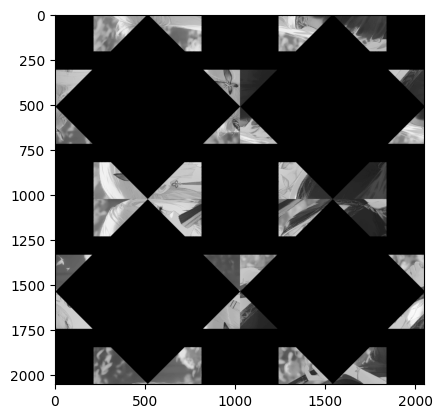

In [2]:
imgSenhe = plt.imread('Res/senheScramble.jpg')
plt.imshow(imgSenhe, cmap='gray')

### Membagi 4 Bagian Citra

In [3]:
h_imgSenhe, w_imgSenhe = imgSenhe.shape
top_left_img = imgSenhe[:h_imgSenhe//2, :w_imgSenhe//2]
top_right_img = imgSenhe[:h_imgSenhe//2, w_imgSenhe//2:]
bottom_left_img = imgSenhe[h_imgSenhe//2:, :w_imgSenhe//2]
bottom_right_img = imgSenhe[h_imgSenhe//2:, w_imgSenhe//2:]

Kode di atas merupakan bagian untuk membagi gambar yang disimpan dalam variabel 'imgSenhe' menjadi 4 bagian yang sama besar, yaitu bagian atas kiri, atas kanan, bawah kiri, bawah kanan. Proses pemisahan dilakukan dengan menggunakan indeks slicing pada matriks gambar. Variabel 'h_imgSenhe' dan 'w_imgSenhe' untuk mengambil tinggi dan lebar dari gambar dengan menggunakan perintah '.shape'

### Menampilkan 4 Bagian Citra Awal

'plt.figure' digunakan untuk membuat sebuah gambar berukuran 10x10 inci. Setelah itu gambar dibagi menjadi 4 bagian yang sama besar, yaitu bagian atas kiri, atas kanan, bawah kiri, dan bawah kanan dari gambar asli. Setiap bagian kemudian ditampilkan dalam subplot matriks 2x2. 'cmap='gray'' pada fungsi 'plt.imshow()' untuk menunjukkan bahwa gambar yang ditampilkan merupakan gambar skala keabuan (grayscale).

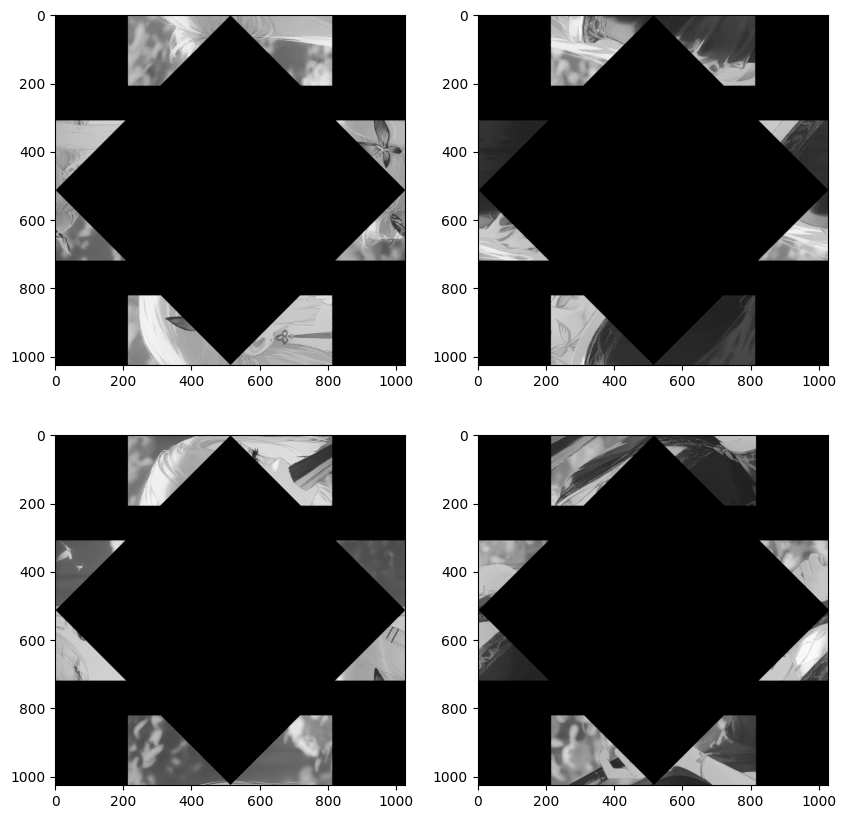

In [4]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(top_left_img, cmap='gray')
plt.subplot(222)
plt.imshow(top_right_img, cmap='gray')
plt.subplot(223)
plt.imshow(bottom_left_img, cmap='gray')
plt.subplot(224)
plt.imshow(bottom_right_img, cmap='gray')

### Membuat Fungsi Translasi

In [5]:
def translasi(img, shift):
    height, width = img.shape
    newImg = np.zeros((height, width)).astype(int)

    for i in range(0, 207):
        for j in range(200, 820):
            if not 0 <= img[i, j] <= 20:
                newImg[i + shift, j] = img[i, j]
    
    for i in range(800, height):
        for j in range(200, 820):
            if not 0 <= img[i, j] <= 20:
                newImg[i - shift, j] = img[i, j]
    
    for i in range(300, 720):
        for j in range(0, 210):
            if not 0 <= img[i, j] <= 20:
                newImg[i, j + shift] = img[i, j]
    
    for i in range(300, 720):
        for j in range(820, width):
            if not 0 <= img[i, j] <= 20:
                newImg[i, j - shift] = img[i, j]
    
    return newImg

Fungsi translasi digunakan untuk melakukan proses pergeseran terhadap citra yang diberikan sesuai dengan nilai pergerseran yang ditentukan. Fungsi ini menginisialisasi matriks baru terlebih dahulu dengan ukuran yang sama dengan citra asli, namun berisi nilai 0. Selanjutnya, fungsi ini memproses citra menggunakan empat perulangan berulang, masing-masing melakukan satu sisi citra, yaitu atas, bawah, kiri, dan kanan. Perulangan-perulangan tersebut mengecek setiap piksel pada sisi yang sesuai dan jika nilai piksel tersebut tidak berada dalam rentang antara 0 hingga 20, nilai piksel tersebut akan disalin ke posisi yang sesuai dalam matriks citra yang baru. Fungsi ini mengembalikan citra yang telah dilakukan translasi.

### Membuat Fungsi Rotasi

In [6]:
def rotasi(img, derajat):
    height, width = img.shape

    rotasiImg = np.zeros((height, width)).astype(int)
    thetha = derajat * np.pi / 180
    cos = np.cos(thetha)
    sin = np.sin(thetha)

    center_x = width//2
    center_y = height//2

    for i in range(height):
        for j in range(width):
            x1 = int((j - center_x) * cos - (i - center_y) * sin + center_x)
            y1 = int((j - center_x) * sin + (i - center_y) * cos + center_y)

            if x1>=0 and x1<width and y1>=0 and y1<height:
                rotasiImg[i, j] = img[y1, x1]
    return rotasiImg

Fungsi rotasi digunakan untuk memutar citra sebesar sudut yang ditentukan. Fungsi ini menginisialisasi matriks baru terlebih dahulu dengan ukuran yang sama dengan citra asli, namun berisi nilai 0. Selanjutnya, fungsi menghitung nilai cos dan sin dari sudut rotasi dalam radian untuk digunakan dalam transformasi rotasi. Kemudian koordinat pusat rotasi dihitung berdasarkan setengah dari lebar dan tinggi citra. Setelah itu, dilakukan perulangan ganda untuk setiap piksel citra, dimana setiap piksel akan dirotasi berdasarkan rumus transformasi rotasi. Hasil dari rotasi akan disalin ke posisi yang sesuai dalam matriks citra yang baru, dengan memeriksa pengkondisian yang ada di dalam perulangan untuk memastikan hasil rotasi tidak jatuh di luar citra asli.

### Membuat Fungsi Crop

In [7]:
def crop(img):
    return img[214:812, 307:718]

Fungsi crop digunakan untuk memotong atau mengambil bagian tertentu dari citra yang diberikan. Fungsi ini mengembalikan potongan citra yang terdefinisi oleh rentang baris dan kolom yang ditentukan.

### Melakukan Proses Translasi Pada Citra

In [8]:
top_left_img = translasi(top_left_img, top_left_img.shape[0]//2)
top_right_img = translasi(top_right_img, top_left_img.shape[0]//2)
bottom_left_img = translasi(bottom_left_img, top_left_img.shape[0]//2)
bottom_right_img = translasi(bottom_right_img, top_left_img.shape[0]//2)

Kode di atas merupakan bagian untuk melakukan translasi terhadap keempat bagian gambar yang telah dipisahkan sebelumnya, yaitu 'top_left_img', 'top_right_img', 'bottom_left_img', dan 'bottom_right_img'. Proses dilakukan dengan pemanggilan fungsi translasi dengan parameter masing-masing bagian dan nilai pergeserannya sebesar setengah tinggi gambar, agar semua bagian gambar tetap berada di dalam batas gambar setelah translasi.

### Menampilkan 4 Bagian Citra Setelah Proses Translasi

'plt.figure' digunakan untuk membuat sebuah gambar berukuran 10x10 inci. Setelah itu gambar dibagi menjadi 4 bagian yang sama besar, yaitu bagian atas kiri, atas kanan, bawah kiri, dan bawah kanan dari gambar asli. Setiap bagian kemudian ditampilkan dalam subplot matriks 2x2. 'cmap='gray'' pada fungsi 'plt.imshow()' untuk menunjukkan bahwa gambar yang ditampilkan merupakan gambar skala keabuan (grayscale).

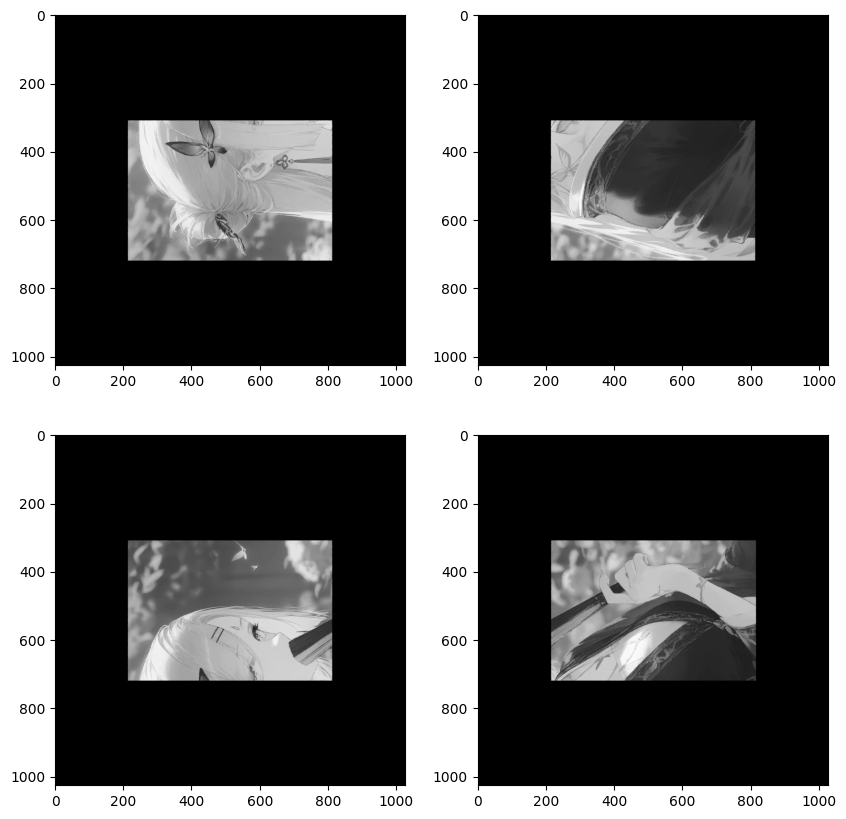

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(top_left_img, cmap='gray')
plt.subplot(222)
plt.imshow(top_right_img, cmap='gray')
plt.subplot(223)
plt.imshow(bottom_left_img, cmap='gray')
plt.subplot(224)
plt.imshow(bottom_right_img, cmap='gray')

### Melakukan Proses Rotasi Pada Citra

In [10]:
top_left_img = rotasi(top_left_img, -90)
top_right_img = rotasi(top_right_img, -90)
bottom_left_img = rotasi(bottom_left_img, -90)
bottom_right_img = rotasi(bottom_right_img, -90)

Kode di atas merupakan bagian untuk melakukan rotasi terhadap keempat bagian gambar yang telah ditranslasi sebelumnya, yaitu 'top_left_img', 'top_right_img', 'bottom_left_img', dan 'bottom_right_img'. Proses dilakukan dengan pemanggilan fungsi rotasi dengan parameter masing-masing bagian dan sudut rotasi -90 derajat, agar rotasi dilakukan searah jarum jam.

### Menampilkan 4 Bagian Citra Setelah Proses Rotasi

'plt.figure' digunakan untuk membuat sebuah gambar berukuran 10x10 inci. Setelah itu gambar dibagi menjadi 4 bagian yang sama besar, yaitu bagian atas kiri, atas kanan, bawah kiri, dan bawah kanan dari gambar asli. Setiap bagian kemudian ditampilkan dalam subplot matriks 2x2. 'cmap='gray'' pada fungsi 'plt.imshow()' untuk menunjukkan bahwa gambar yang ditampilkan merupakan gambar skala keabuan (grayscale).

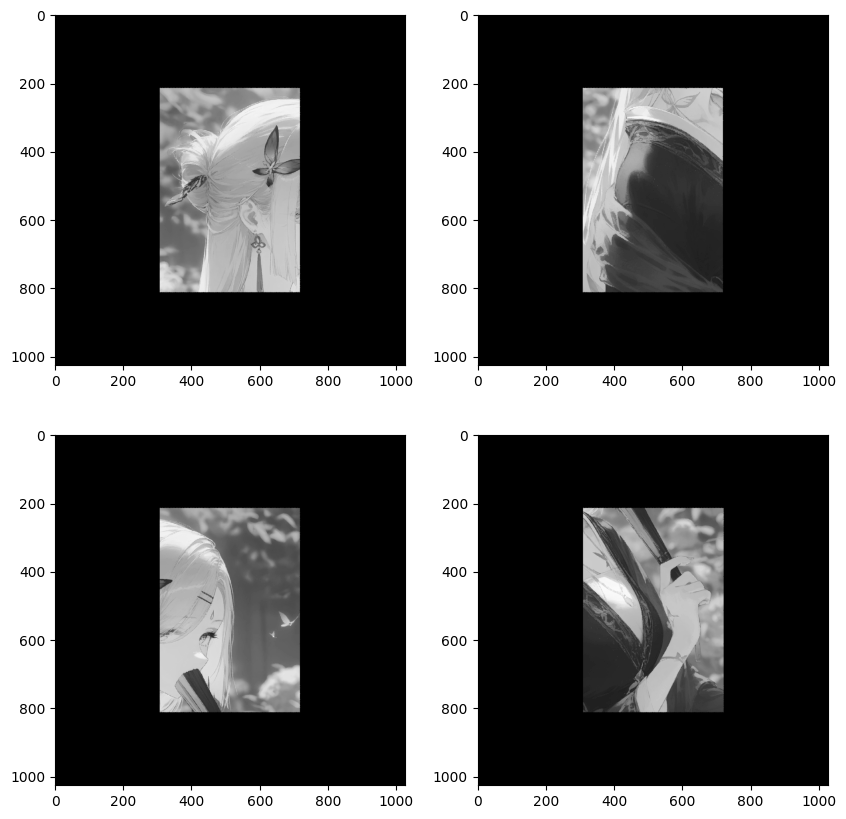

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(top_left_img, cmap='gray')
plt.subplot(222)
plt.imshow(top_right_img, cmap='gray')
plt.subplot(223)
plt.imshow(bottom_left_img, cmap='gray')
plt.subplot(224)
plt.imshow(bottom_right_img, cmap='gray')

### Melakukan Proses Crop Pada Citra

In [12]:
top_left_img = crop(top_left_img)
top_right_img = crop(top_right_img)
bottom_left_img = crop(bottom_left_img)
bottom_right_img = crop(bottom_right_img)

Kode di atas merupakan bagian untuk melakukan crop terhadap keempat bagian gambar yang telah dirotasi sebelumnya, yaitu 'top_left_img', 'top_right_img', 'bottom_left_img', dan 'bottom_right_img'. Proses dilakukan dengan pemanggilan fungsi crop dengan parameter masing-masing bagian.

### Menampilkan 4 Bagian Citra Setelah Proses Crop

'plt.figure' digunakan untuk membuat sebuah gambar berukuran 10x10 inci. Setelah itu gambar dibagi menjadi 4 bagian yang sama besar, yaitu bagian atas kiri, atas kanan, bawah kiri, dan bawah kanan dari gambar asli. Setiap bagian kemudian ditampilkan dalam subplot matriks 2x2. 'cmap='gray'' pada fungsi 'plt.imshow()' untuk menunjukkan bahwa gambar yang ditampilkan merupakan gambar skala keabuan (grayscale).

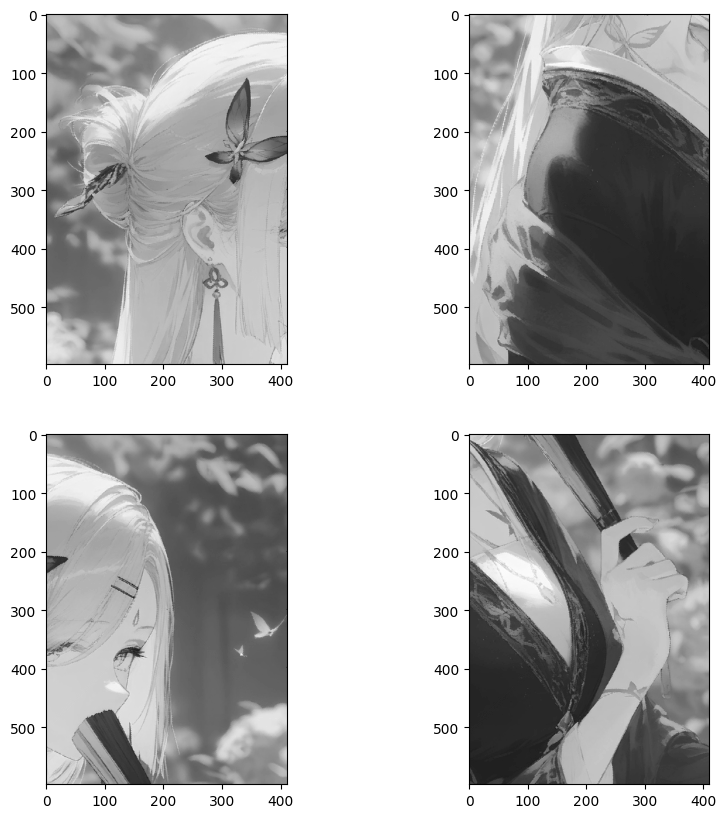

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(top_left_img, cmap='gray')
plt.subplot(222)
plt.imshow(top_right_img, cmap='gray')
plt.subplot(223)
plt.imshow(bottom_left_img, cmap='gray')
plt.subplot(224)
plt.imshow(bottom_right_img, cmap='gray')

### Menggabungkan Keempat Bagian Citra Setelah Proses Translasi, Rotasi dan Crop

'senheScramble' merupakan matriks nol dengan ukuran dua kali lebih besar dari ukuran setiap bagian gambar. Setiap bagian gambar kemudian ditempatkan di posisi yang sesuai dalam 'senheScramble' menggunakan operasi slicing. Setelah itu, gambar yang telah disusun dari keempat bagian gambar tersebut ditampilkan menggunakan 'plt.imshow()' dengan skala keabuan (grayscale) dan ukuran figur 10x10 inci.

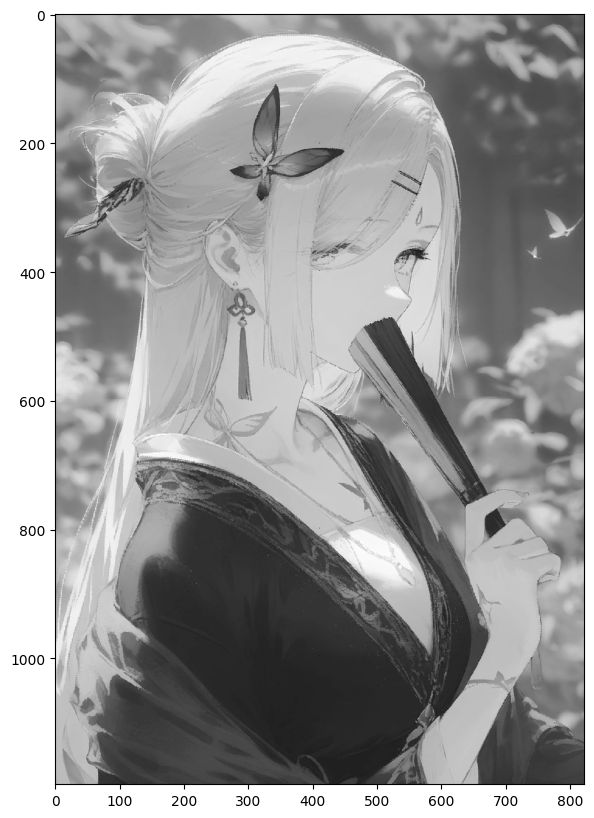

In [14]:
senheScramble = np.zeros((top_left_img.shape[0]*2, top_left_img.shape[1]*2)).astype(np.uint8)
senheScramble[:top_left_img.shape[0], :top_left_img.shape[1]] = top_left_img
senheScramble[:bottom_left_img.shape[0], bottom_left_img.shape[1]:] = bottom_left_img
senheScramble[top_right_img.shape[0]:, :top_right_img.shape[1]] = top_right_img
senheScramble[bottom_right_img.shape[0]:, bottom_right_img.shape[1]:] = bottom_right_img

plt.figure(figsize=(10,10))
plt.imshow(senheScramble, cmap='gray')

### Membuat Fungsi Untuk Mencari Target

In [15]:
def findTargets(img):
    histogram = np.zeros(256).astype(int)
    hImg, wImg = img.shape

    for i in range(hImg):
        for j in range(wImg):
            value = img[i, j]
            histogram[value] += 1
    
    dist_kumulatif = np.zeros(256).astype(int)
    dist_kumulatif[0] = histogram[0]
    for i in range(1, 256):
        dist_kumulatif[i] = dist_kumulatif[i-1] + histogram[i]
    
    target_value = dist_kumulatif * (256-1) / (hImg * wImg)
    target_value = np.round(target_value).astype(int)

    return target_value

Fungsi findTargets digunakan untuk menghitung distribusi kumulatif histogram, lalu menghitung nilai target yang digunakan dalam proses ekualisasi. Nilai target ini, untuk memastikan distribusi piksel dalam citra setelah diekualisasi akan merata. Fungsi ini mengembalikan array nilai target yang telah dihitung.

### Menginisialisasi Citra Setelah Ekualisasi dan Menampilkan Citra Sebelum dan Setelah Ekualisasi

'target_senhe' digunakan untuk menampung nilai target untuk ekualisasi histogram dari fungsi 'findTargets()', selanjutnya 
'ekualisasi_senhe' digunakan untuk menyimpan citra yang telah diekualisasi. Kemudian, menampilkan dua citra grayscale sebelum dan setelah proses ekualisasi histogram. Sebelumnya, citra mungkin memiliki distribusi intensitas yang tidak merata. Setelah ekualisasi, distribusi intensitas disesuaikan, meningkatkan detail dan kontras citra, menghasilkan gambar yang lebih baik.

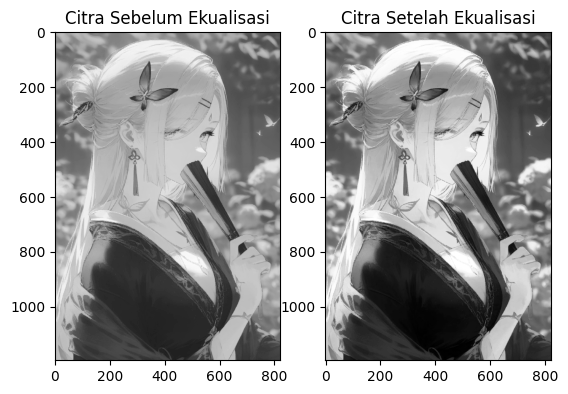

In [16]:
target_senhe = findTargets(senheScramble)
ekualisasi_senhe = np.zeros((senheScramble.shape[0], senheScramble.shape[1])).astype(int)
for i in range(senheScramble.shape[0]):
    for j in range(senheScramble.shape[1]):
        ekualisasi_senhe[i, j] = target_senhe[senheScramble[i, j]]
        
plt.subplot(121)
plt.title('Citra Sebelum Ekualisasi')
plt.imshow(senheScramble, cmap='gray')
plt.subplot(122)
plt.title('Citra Setelah Ekualisasi')
plt.imshow(ekualisasi_senhe, cmap='gray')

### Membuat Fungsi Histogram

In [17]:
def histogram(img):
    hg = np.zeros(256).astype(int)
    tinggi, lebar = img.shape
    for i in range(tinggi):
        for j in range(lebar):
            hg[img[i, j]] += 1
    xHisto = [i for i in range(256)]
    plt.bar(xHisto, hg)

Fungsi histogram digunakan untuk menghitung dan menampilkan histogram dari citra grayscale menggunakan library matplotlib. Pada awalnya, fungsi ini menginisialisasi array kosong untuk menyimpan frekuensi kemunculan setiap intensitas piksel dari 0 hingga 255. Selanjutnya, citra grayscale diperiksa piksel per piksel, dan frekuensi kemunculan intensitas piksel tersebut dihitung dan disimpan dalam array histogram. Setelah selesai menghitung histogram, fungsi ini menggunakan library matplotlib untuk membuat diagram batang yang merepresentasikan distribusi intensitas piksel dalam citra. 

### Menampilkan Histogram Sebelum dan Sesudah Ekualisasi

Di bawah ini, terdapat histogram sebelum dan setelah diekualisasi dengan jarak antara subplotnya sebesar 0,2 yang ditampilkan menggunakan matplitlob

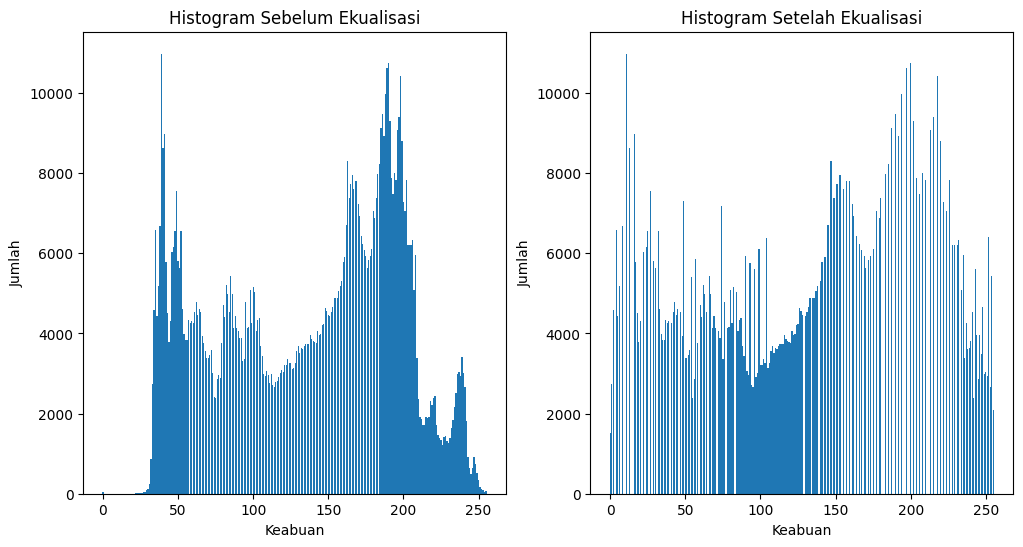

In [18]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("Histogram Sebelum Ekualisasi")
plt.ylabel('Jumlah')
plt.xlabel('Keabuan')
histogram(senheScramble)
plt.subplot(122)
plt.title("Histogram Setelah Ekualisasi")
plt.ylabel('Jumlah')
plt.xlabel('Keabuan')
histogram(ekualisasi_senhe)

plt.subplots_adjust(wspace=0.2)

### Membaca dan Mengubah Citra Kurumi dan Citra Megumin Menjadi Grayscale

Citra "kurumi.jpg" dan "megumin.jpg" dibaca menggunakan fungsi plt.imread() dari library matplotlib yang akan menghasilkan representasi citra dalam bentuk array numpy. Setelah dibaca, masing-masing citra tersebut diubah menjadi citra grayscale dengan perintah cvtColor menggunakan library openCV.

In [19]:
target_kurumi = plt.imread('Res/kurumi.jpg')
target_megumin = plt.imread('Res/megumin.jpg')
target_kurumi_grayscale = cv.cvtColor(target_kurumi, cv.COLOR_BGR2GRAY)
target_megumin_grayscale = cv.cvtColor(target_megumin, cv.COLOR_BGR2GRAY)

### Membuat Fungsi Untuk Mencari Nilai Minimum

In [20]:
def find_min_color(nilai, tujuan):
    min = abs(nilai-tujuan[0])
    color_min = 0
    for i in range(len(tujuan)):
        check = abs(nilai-tujuan[i])
        if(min > check):
            min = check
            color_min = i
    return color_min

Fungsi 'find_min_color' digunakan untuk mencari nilai target yang memiliki selisih absolut terkecil dengan nilai input, kemudian fungsi ini akan mengembalikan indeks warna yang sesuai.

### Membuat Fungsi Mapping

In [21]:
def mapping(citra_awal, citra_target):
    map = np.zeros(256).astype(int)
    for i in range(256):
        map[i] = find_min_color(citra_awal[i], citra_target)
    result = np.zeros(ekualisasi_senhe.shape).astype(int)
    for i in range(ekualisasi_senhe.shape[0]):
        for j in range(ekualisasi_senhe.shape[1]):
            result[i, j] = map[ekualisasi_senhe[i,j]]
    return result

Fungsi 'mapping' membuat peta pemetaan dengan mengiterasi melalui setiap nilai intensitas piksel dalam citra awal, dan menggunakan fungsi 'find_min_color' untuk mencari nilai terdekat dalam citra target. Selanjutnya, fungsi ini menggunakan peta pemetaan untuk memetakan intensitas piksel dari citra target ke citra hasil, dengan mengganti setiap nilai piksel dalam citra hasil dengan nilai yang sesuai dari peta pemetaan. Kemudian, mengembalikan nilai citra hasilnya.

### Melakukan Pemrosesan dengan Memanggil Fungsi Find Targets

In [22]:
target_awal = findTargets(ekualisasi_senhe)
find_kurumi = findTargets(target_kurumi_grayscale)
find_megumin = findTargets(target_megumin_grayscale)

Kode di atas digunakan untuk mencari nilai target yang diperlukan dalam proses ekualisasi histrogram untuk setiap citra grayscale 'ekualisasi_senhe', 'target_kurumi_grayscale' dan 'target_megumin_grayscale'

### Melakukan Pemrosesan dengan Memanggil Fungsi Mapping

In [23]:
speseifikasi_kurumi = mapping(target_awal, find_kurumi)
spesifikasi_megumin = mapping(target_awal, find_megumin)

Kode di atas digunakan untuk memetakan citra 'target_awal' ke citra target yang baru, yaitu 'spesifikasi_kurumi' dan 'spesifikasi_megumin', dengan menggunakan nilai target yang telah ditemukan sebelumnya untuk 'target_kurumi_grayscale' dan 'target_megumin_grayscale'.

### Menampilkan Citra Asal, Citra Kurumi dan Spesifikasi Citra Kurumi 

'fig, axs = plt.subplots(1, 2, figsize=(12,10))' digunakan untuk membuat gambar subplot dengan dua gambar secara horizontal. Subplot pertama, menampilkan citra yang belum dispesifikasi dan subplot kedua, menampilkan citra setelah dispesifikasi dengan target kurumi.

Text(0.5, 1.0, 'Spesifikasi Citra Kurumi')

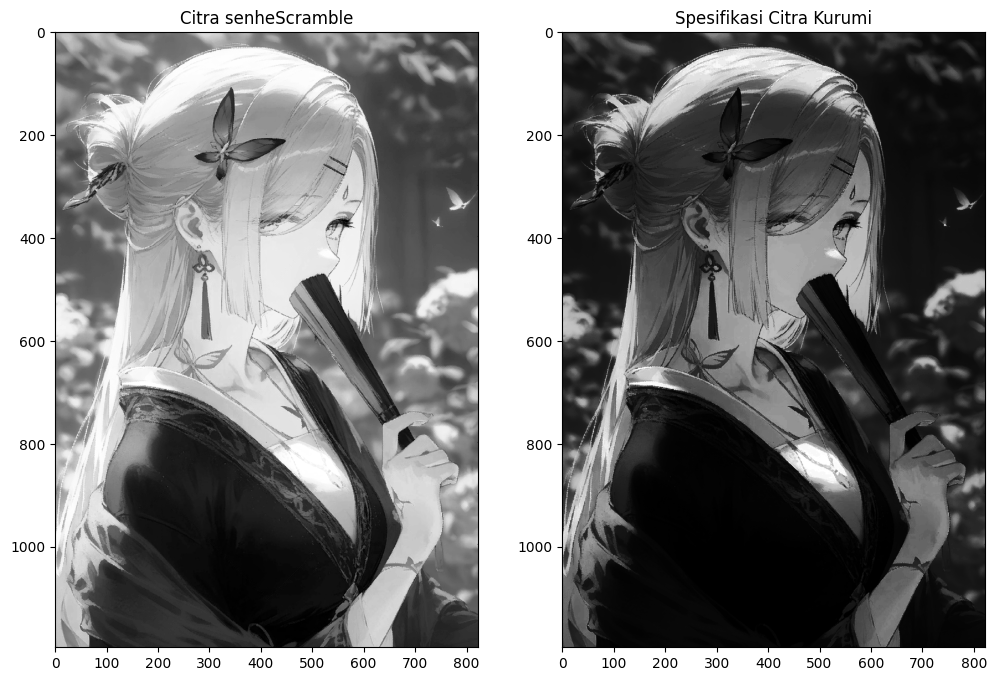

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12,10))
axs[0].imshow(ekualisasi_senhe, cmap='gray')
axs[0].set_title('Citra senheScramble')
axs[1].imshow(speseifikasi_kurumi, cmap='gray')
axs[1].set_title('Spesifikasi Citra Kurumi')

### Menampilkan Citra Asal, Citra Megumin dan Spesifikasi Citra Megumin 

'fig, axs = plt.subplots(1, 2, figsize=(12,10))' digunakan untuk membuat gambar subplot dengan dua gambar secara horizontal. Subplot pertama, menampilkan citra yang belum dispesifikasi dan subplot kedua, menampilkan citra setelah dispesifikasi dengan target megumin.

Text(0.5, 1.0, 'Spesifikasi Citra Megumin')

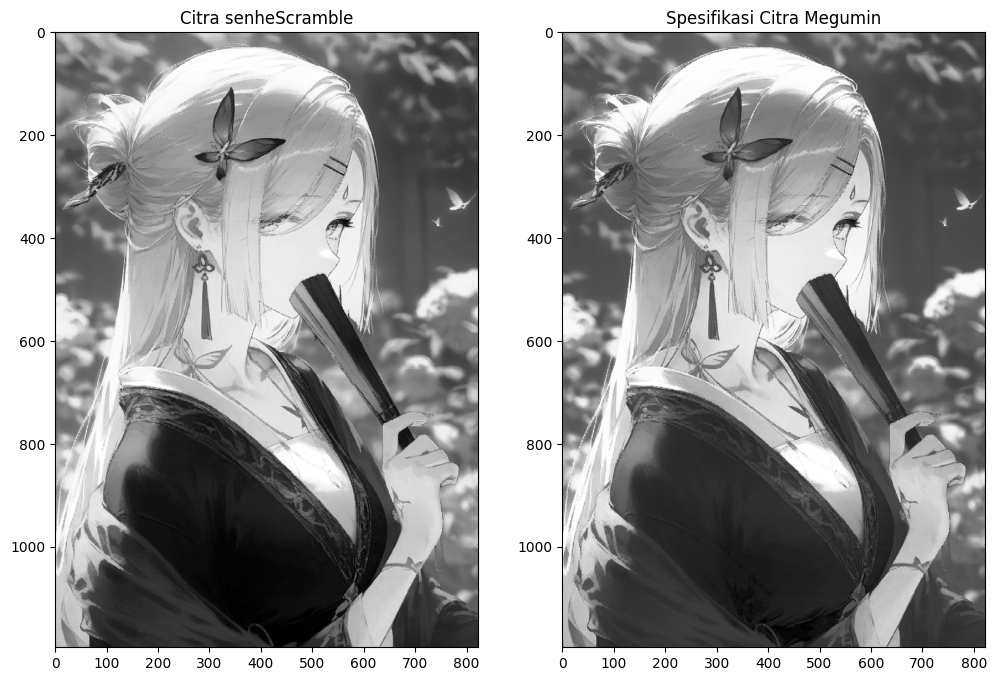

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12,10))
axs[0].imshow(ekualisasi_senhe, cmap='gray')
axs[0].set_title('Citra senheScramble')
axs[1].imshow(spesifikasi_megumin, cmap='gray')
axs[1].set_title('Spesifikasi Citra Megumin')

Kesimpulan:
Spesifikasi pada citra target kurumi menghasilkan citra yang lebih jelas dengan warna yang cenderung gelap. Hal ini disebabkan oleh beberapa nilai piksel mendekati 0 dalam citra targetnya, yang menyebabkan gambar menjadi cenderung gelap. Sementara itu, spesifikasi pada citra target megumin menghasilkan citra yang lebih jelas dengan warna yang cenderung terang. Hal ini disebabkan oleh beberapa nilai piksel mendekati 255 dalam citra targetnya, yang membuat gambar menjadi cenderung terang.


### Membuat Fungsi Search Spesifikasi

In [26]:
def search_spesifikasi(img):
    tinggi, lebar = img.shape

    total_piksel = 0
    for i in range(tinggi):
        for j in range(lebar):
            total_piksel += img[i, j]

    mean = total_piksel / (tinggi*lebar)
    targetSpesifikasi = findTargets(img)
    spesifikasiKurumi = findTargets(target_kurumi_grayscale)
    spesifikasiMegumin = findTargets(target_megumin_grayscale)
    if mean <= 128:
        result_spesifikasi = mapping(targetSpesifikasi, spesifikasiKurumi)
    else:
        result_spesifikasi = mapping(targetSpesifikasi, spesifikasiMegumin)
    return result_spesifikasi
    

Fungsi 'search_spesifikasi' digunakan untuk mencari spesifikasi yang sesuai untuk suatu citra 'img'. Pertama, fungsi menghitun rata-rata intensitas piksel dari citra tersebut. Jika kurang dari atau sama dengan 128, fungsi memetakan citra input ke spesifikasi citra kurumi. Jika tidak, fungsi memetakan citra input ke spesifikasi citra megumin. Fungsi akan mengembalikan citra yang sudah dipetakan.

### Membuat Fungsi Senhe Bagian

In [27]:
def senhe_bagian(img, angka1, angka2, x1, y1):
    tinggi, lebar = img.shape
    senhe = img[(angka1-1)*tinggi//y1:angka1*tinggi//y1, (angka2-1)*lebar//x1:angka2*lebar//x1]
    return senhe

Fungsi 'senhe_bagian' digunakan untuk membagi citra 'img' menjadi bagian-bagian yang lebih kecil, dengan parameter 'angka1' dan 'angka2' untuk bagian mana dari citra yang ingin dipotong, serta parameter 'x1' dan 'y1' untuk menentukan jumlah bagian secara horizontal dan vertikal. Fungsi akan mengembalikan citra yang dipotong.

### Membuat Fungsi Spesifikasi Pecahan

In [28]:
def spesifikasi_pecahan(img, y, x):
    senhe_results = []

    for i in range(1, y+1):
        row = []
        for j in range(1, x+1):
            result = senhe_bagian(ekualisasi_senhe, i, j, x, y)
            result = search_spesifikasi(result)
            result = senhe_bagian(result, i, j, x, y)
            row.append(result)
        senhe_results.append(row)
    return senhe_results

Fungsi 'spesifikasi_pecahan' melakukan proses iterasi melalui setiap bagian dari citra berdasarkan jumlah pecahan secara horizontal dan vertikal. Setiap bagian citra dipotong menggunakan fungsi 'senhe_bagian()', kemudian dicari spesifikasinya dengan menggunakan fungsi 'search_spesifikasi()'. Hasilnya, setiap bagian citra yang telah diproses sesuai dengan spesifikasi disimpan dalam bentuk matriks, yang kemudian dikembalikan sebagai output fungsi.

### Membuat Fungsi Merge

In [29]:
def merge(image, y, x, gap = 0):
    max_height = image[0][0].shape[0]
    max_width = image[0][0].shape[1]

    for i in range(y):
        for j in range(x):
            img = image[i][j]
            if img.shape[0]>max_height:
                max_height = img.shape[0]
            if img.shape[1]>max_width:
                max_width = img.shape[1]

    merge_height = max_height * y + gap * (y - 1)
    merge_width = max_width * x + gap * (x - 1)

    merge_img = np.zeros((merge_height, merge_width)).astype(np.uint8)

    for i in range(y):
        for j in range(x):
            img = image[i][j]

            y_start = i * (max_height + gap)
            y_end = y_start + img.shape[0]
            x_start = j * (max_width + gap)
            x_end = x_start + img.shape[1]

            merge_img[y_start:y_end, x_start:x_end] = img
        
    return merge_img

Fungsi 'merge' digunakan untuk menggabungkan sejumlah citra yang telah diproses menjadi satu citra tunggal. Fungsi mengidentifikasi dimensi maksimum dari citra-citra yang akan digabungkan. Selanjutnya fungsi menghitung dimensi citra hasil gabungan berdasarkan jumlah citra secara vertikal, horizontal, dan jarak antara citra. Citra hasil gabungan kemudian diinisialisasi sebagai matriks nol dengan ukuran yang telah dihitung sebelumnya. Setelah itu, setiap citra dalam matriks 'image' diposisikan secara tepat dalam citra gabungan sesuai dengan koordinatnya, dengan memperhitungkan jarak antara citra. Fungsi ini akan mengembalikan citra tunggal yang merupakan gabungan dari semua citra yang telah diproses.

### Melakukan Pemrosesan dengan Memanggil Fungsi Spesifikasi Pecahan dan Fungsi Merge

In [30]:
senhe_1x1 = spesifikasi_pecahan(ekualisasi_senhe, 1, 1)
merge_1x1 = merge(senhe_1x1, 1, 1, 0)
senhe_1x2 = spesifikasi_pecahan(ekualisasi_senhe, 1, 2)
merge_1x2 = merge(senhe_1x2, 1, 2, 0)
senhe_2x2 = spesifikasi_pecahan(ekualisasi_senhe, 2, 2)
merge_2x2 = merge(senhe_2x2, 2, 2, 0)
senhe_2x16 = spesifikasi_pecahan(ekualisasi_senhe, 2, 16)
merge_2x16 = merge(senhe_2x16, 2, 16, 0)
senhe_16x16 = spesifikasi_pecahan(ekualisasi_senhe, 16, 16)
merge_16x16 = merge(senhe_16x16, 16, 16, 0)

Kode di atas digunakan untuk membuat beberapa pecahan yang berbeda dari citra 'ekualisasi_senhe', masing-masing dengan spesifikasinya sendiri. Citra dibagi menjadi pecahan 1x1, 1x2, 2x2, 2x16, dan 16x16 menggunakan fungsi 'spesifikasi_pecahan()'. Kemudian setiap kelompok pecahan digabungkan kembali menjadi citra tunggal menggunakan fungsi 'merge()' dengan jarak antara pecahan senilai 0.

### Menampilkan Kelompok Citra Pecahan

'plt.figure(figsize=(15, 15))' digunakan untuk membuat figur dengan ukuran 15x15 inci yang digunakan untuk menampilkan lima citra yang telah digabungkan kembali menjadi citra tunggal untuk masing-masing variasi jumlah pecahan dari citra 'ekualisasi_senhe'. Setiap citra ditampilkan dalam sublot terpisah dengan judul yang sesuai, menggunakan colormap 'gray', untuk citra grayscale dan sumbu yang dinonaktifkan.

(-0.5, 831.5, 1199.5, -0.5)

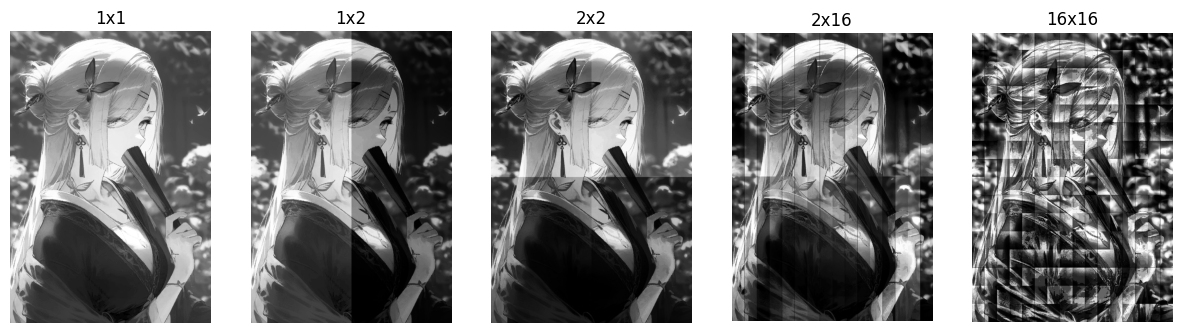

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 5, 1)
plt.title('1x1')
plt.imshow(merge_1x1, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 2)
plt.title('1x2')
plt.imshow(merge_1x2, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 3)
plt.title('2x2')
plt.imshow(merge_2x2, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 4)
plt.title('2x16')
plt.imshow(merge_2x16, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 5)
plt.title('16x16')
plt.imshow(merge_16x16, cmap='gray')
plt.axis('off')

Hasil Analisa dan Kesimpulan:

Gambar yang mengalami split akan terpecah menjadi beberapa bagian tergantung dari berapa ukuran yang diinginkan. Beberapa pecahan gambar dispesifikasi dengan citra abu-abu dari kurumi karena rata-rata nilai pikselnya kurang dari atau sama dengan 128, sehingga membuat gambar terlihat lebih gelap. Di sisi lain, beberapa pecahan gambar yang juga telah dispesifikasi dengan citra abu-abu dari megumin karena rata-rata nilai pikselnya melebihi 128, yang membuatnya lebih cerah.

Gambar 1x1 dan 1x2, cenderung memiliki resolusi rendah dan detail yang kurang jelas, gambar-gambar dengan spesifikasi lebih tinggi, seperti 2x2, 2x16, dan 16x16, menampilkan detail yang lebih tajam dan jelas, memudahkan identifikasi objek.

Dalam hal segmentasi citra, spesifikasi yang lebih tinggi menghasilkan gambar yang lebih jelas, detail yang lebih baik. dan pemisahan yang lebih baik antara objek dan latar belakang.